<a href="https://colab.research.google.com/github/michaelsew/onvolunteers-notebook/blob/test-gemini-local-fix/google_drive_reporting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Login to OnVolunteers

In [ ]:
%pip install --upgrade --quiet  playwright > /dev/null
%pip install --upgrade --quiet  lxml > /dev/null
!playwright install --with-deps chromium  #Chrome

**Add OnVolunteers Username & Password to your Secrets**

1. On the left panel, click the "Key" icon
1. Click "Add new secret" named `ov_username`, value = your OV admin user
1. Click "Add new secret" with name `ov_password`, filling in your password.
1. Click "Notebook access" to enable BOTH.

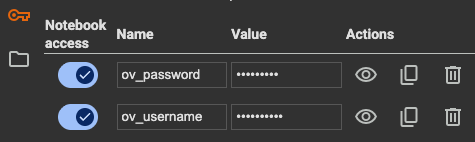




Login to OnVolunteers with your Admin Username & Password in One Click:

In [ ]:
# Login to OnVolunteers with google colab secret's Username & Password.
# Should land us on the homepage.
import asyncio
from playwright.async_api import async_playwright
from google.colab import userdata

async def login_to_onvolunteers():
    async with async_playwright() as p:
        # Launch browser in headless mode
        browser = await p.chromium.launch(headless=True)
        page = await browser.new_page()

        # Navigate to the login page
        await page.goto("http://sfx.onvolunteers.com")

        # Click the "Administrator Click Here" link
        await page.get_by_role("link", name="Administrator Click Here ").click()

        # Get username and password from google colab secrets
        from google.colab import userdata
        username = userdata.get("ov_username")
        password = userdata.get("ov_password")

        # Fill in the username and password
        await page.get_by_placeholder("username or email").fill(username)
        await page.get_by_placeholder("password").fill(password)

        # Click the login button
        await page.get_by_role("link", name="Login").click()

        # Wait for navigation to complete
        await page.wait_for_url("https://portal.onvolunteers.com/Default.aspx")

        print("Successfully logged in to SFX OnVolunteers.")

        #await browser.close() # leave browser open for further actions

await login_to_onvolunteers()

In [ ]:
async def get_reports_list():
    async with async_playwright() as p:

        # Hover over the "Reports" menu
        await page.get_by_role("link", name=" Reports").hover()

        # Click the "Built-in Reports" link
        await page.get_by_role("link", name="Built-in Reports").click()

        # Wait for the reports page to load
        await page.wait_for_url("https://portal.onvolunteers.com/Report.aspx")

        # Get the report options from the combobox
        report_options_text = await page.get_by_role("combobox").inner_text()
        report_options = report_options_text.split('\n')

        print("Available reports:")
        for option in report_options:
            if option != "Select Report":
                print(option)

        await browser.close()

await get_reports_list()

## Parking Hours Report Generation

This notebook helps generate a parking hours report from an Excel file stored in Google Drive.

**Instructions:**

1.  **Set the Report Date:** In the code cell below, set the `REPORT_DATE_STR` variable to the desired date for the report in "YYYY-MM-DD" format.
1.  **Connect to Google Drive:** Run the code cell to connect and authorize access to your Google Drive.

In [ ]:
# Set the report date in YYYY-MM-DD format
REPORT_DATE_STR = "2025-08-07"

# Connect to Google Drive and authorize
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

**Generate Report:** load the Parking hours folder

In [ ]:
import pandas as pd
from datetime import datetime

REPORT_DATE = datetime.strptime(REPORT_DATE_STR, "%Y-%m-%d").date()

# Construct the directory path
parking_dir = f'/content/drive/My Drive/PTA 2025-2026 SHARED FOLDER/Subcommittees/OnVolunteers/Reports/parking-hours'
parking_file = f'{parking_dir}/parking-hours-{REPORT_DATE_STR}.xlsx'

# Load the Excel file into a pandas DataFrame
try:
    df_parking_hours = pd.read_excel(parking_file)
    print(f"Successfully loaded data from {parking_file}")
    # Display the head of the loaded DataFrame
    display(df_parking_hours.head())
except FileNotFoundError:
    print(f"Error: File not found at {parking_file}")
except Exception as e:
    print(f"An error occurred: {e}")


Read Volunteer-Hours report (from `PTA 2025-2026 SHARED FOLDER/Subcommittees/OnVolunteers/Reports/volunteer-hours`)

In [ ]:
import pandas as pd
from datetime import datetime

# Construct the directory path
volunteer_hours_dir = f'/content/drive/My Drive/PTA 2025-2026 SHARED FOLDER/Subcommittees/OnVolunteers/Reports/volunteer-hours'
volunteer_hours_file = f'{volunteer_hours_dir}/volunteer-hours-{REPORT_DATE_STR}.xlsx'

# Load the Excel file into a pandas DataFrame
try:
    df_volunteer_hours = pd.read_excel(volunteer_hours_file)
    print(f"Successfully loaded data from {volunteer_hours_file}")
    # Display the head of the loaded DataFrame
    display(df_volunteer_hours.head())
except FileNotFoundError:
    print(f"Error: File not found at {volunteer_hours_file}")
except Exception as e:
    print(f"An error occurred: {e}")


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('First Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Task
Analyze the parking data in the dataframe to determine and visualize the distribution of families who have completed 3 or more hours of parking versus those who have not.

## Calculate completed hours

### Subtask:
Determine which families have completed 3 or more hours and which have not.


**Reasoning**:
Add a new column 'Completed 3+ Hours' to the dataframe and populate it based on whether 'Total Hours' is greater than or equal to 3.



In [ ]:
df_parking_hours['Completed 3+ Hours'] = df_parking_hours['Total Hours'] >= 3
display(df_parking_hours[['Total Hours', 'Completed 3+ Hours']].head())

## Visualize the distribution

### Subtask:
Create a visualization to show the distribution of families who have completed 3 hours and those who have not.


**Reasoning**:
Create a countplot to visualize the distribution of families based on whether they completed 3 or more hours, add title and labels to the plot.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Completed 3+ Hours', data=df_parking_hours)
plt.title('Distribution of Families by Completion of 3+ Parking Hours')
plt.xlabel('Completed 3+ Hours')
plt.ylabel('Number of Families')
plt.show()

# Task
List the families who have not completed their required 3 hours of parking volunteering and calculate the amount owing for each.

In [ ]:
df_owing_families = df_parking_hours[df_parking_hours['Completed 3+ Hours'] == False]
display(df_owing_families.head())

In [ ]:
# Assume a cost per hour
COST_PER_HOUR = 20

# Calculate remaining hours
df_owing_families['Hours Owing'] = 3 - df_owing_families['Total Hours']

# Calculate the amount owing
df_owing_families['Amount Owing'] = df_owing_families['Hours Owing'] * COST_PER_HOUR

# Display the head of the updated DataFrame
display(df_owing_families[['Last Name', 'First Name', 'Total Hours', 'Hours Owing', 'Amount Owing']].head())

In [ ]:
# Select the specified columns
df_owing_families_report = df_owing_families[['Last Name', 'First Name', 'Amount Owing']]

# Display the selected columns
display(df_owing_families_report)

In [ ]:
%pip install xlsxwriter

import xlsxwriter
# Construct the full path for the new Excel file
fines_file_path = f'{parking_dir}/parking-hours-{REPORT_DATE_STR}-fines.xlsx'

# Save the DataFrame to an Excel file with column width formatting
try:
    writer = pd.ExcelWriter(fines_file_path, engine='xlsxwriter')
    df_not_completed_report.to_excel(writer, index=False, sheet_name='Fines Report')

    # Get the xlsxwriter workbook and worksheet objects.
    workbook  = writer.book
    worksheet = writer.sheets['Fines Report']

    # Auto-adjust column widths
    for i, col in enumerate(df_not_completed_report.columns):
        max_len = max(df_not_completed_report[col].astype(str).str.len().max(), len(col)) + 2
        worksheet.set_column(i, i, max_len)

    writer.close()
    print(f"Successfully saved the fines report to {fines_file_path} with formatted column widths.")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

In [ ]:
# Filter for families who have not completed 3+ hours
df_not_completed = df_parking_hours[df_parking_hours['Total Hours'] < 3].copy()

# Calculate remaining hours
df_not_completed['Hours Remaining'] = 3 - df_not_completed['Total Hours']

# Calculate the fine amount (assuming a $100 fine per remaining hour)
FINE_PER_HOUR = 100
df_not_completed['Fine Amount'] = df_not_completed['Hours Remaining'] * FINE_PER_HOUR

# Select and display the desired columns
df_not_completed_report = df_not_completed[['Last Name', 'First Name', 'Finished Hours', 'Hours Remaining', 'Fine Amount']]
display(df_not_completed_report)